## Đọc file

In [1]:
import pandas as pd
name_table=['DSTK','DS môn TC','DS co Diem','Dulieu0205']
data={}
for i in name_table:
    if i !='DSTK'and i!='DS môn TC':
        data[i]=pd.read_excel('THONGKESVISHOCTUCHON.xlsx',sheet_name=i)
    else:
        data[i]=pd.read_excel('THONGKESVISHOCTUCHON.xlsx',sheet_name=i,header=1)

In [2]:
for i in data.keys():
    print(f"DataFrame for key: {i}")
    print(data[i].head(5))
    print('\n' + '-'*100+ '\n')

DataFrame for key: DSTK
   IDSinhVien  MaMonHoc           TenDot
0   1677250.0    3197.0  HK1 (2019-2020)
1   1677250.0    3203.0  HK2 (2019-2020)
2   1677250.0    3395.0  HK1 (2020-2021)
3   1677250.0    1076.0  HK1 (2020-2021)
4   1677250.0     901.0  HK1 (2020-2021)

----------------------------------------------------------------------------------------------------

DataFrame for key: DS môn TC
   HK  Mã môn                            Tên Môn  HK.1  Thuoc KCNTT
0   2    3240  Hàm phức và phép biến đổi Laplace     2            0
1   2    3395                          Logic học     2            0
2   2    3320                   Phương pháp tính     2            0
3   2    3193                      Toán ứng dụng     2            0
4   2    3345                   Vật lý đại cương     2            0

----------------------------------------------------------------------------------------------------

DataFrame for key: DS co Diem
   IDSinhVien  MaMonHoc           TenDot   HK  DiemTongKe

## Tiền xử lý 

In [3]:
#DSTK DS co Diem
data['DSTK']=data['DSTK'].dropna()
data['DS co Diem']=data['DS co Diem'].dropna()

In [4]:
data['DS co Diem'].shape

(4014, 5)

In [5]:
data['DSTK'].isnull().sum()

IDSinhVien    0
MaMonHoc      0
TenDot        0
dtype: int64

In [6]:
data['DS co Diem'].isnull().sum()

IDSinhVien     0
MaMonHoc       0
TenDot         0
HK             0
DiemTongKet    0
dtype: int64

In [7]:
#Dulieu0205
#Trung bình điểm của từng môn
# mean_scores = data['Dulieu0205'].groupby('MaMonHoc')['DiemTongKet'].mean()

In [8]:
# data['Dulieu0205']['DiemTongKet'] = data['Dulieu0205'].apply(
#     lambda row: mean_scores[row['MaMonHoc']] if pd.isnull(row['DiemTongKet']) else row['DiemTongKet'],# bằng mean nếu null còn không null giữ nguyên giá trị hiện tại
#     axis=1
# )

In [9]:
data['Dulieu0205']=data['Dulieu0205'].dropna()

In [10]:
data['Dulieu0205'].isnull().sum()

GioiTinh       0
IDLopHoc       0
IDSinhVien     0
MaMonHoc       0
TenDot         0
DiemTongKet    0
Thuộc KCNTT    0
dtype: int64

In [11]:
data['DS môn TC']=data['DS môn TC'].rename(columns={'Mã môn':'MaMonHoc'})

In [12]:
unique_data = data['DS môn TC'][['MaMonHoc','HK']].drop_duplicates()
data['Dulieu0205'] = data['Dulieu0205'].merge(unique_data, on='MaMonHoc', how='left', suffixes=('HK'))
data['Dulieu0205']

TypeError: Passing 'suffixes' as a <class 'str'>, is not supported. Provide 'suffixes' as a tuple instead.

In [ ]:
data['Dulieu0205'].isnull().sum()

GioiTinh       0
IDLopHoc       0
IDSinhVien     0
MaMonHoc       0
TenDot         0
DiemTongKet    0
Thuộc KCNTT    0
HK             0
dtype: int64

In [ ]:
with pd.ExcelWriter('Processed_THONGKESVISHOCTUCHON.xlsx') as writer:
    for sheet_name, df in data.items():
        df.to_excel(writer, sheet_name=sheet_name, index=False)


PermissionError: [Errno 13] Permission denied: 'Processed_THONGKESVISHOCTUCHON.xlsx'

## Trực quan hóa

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns

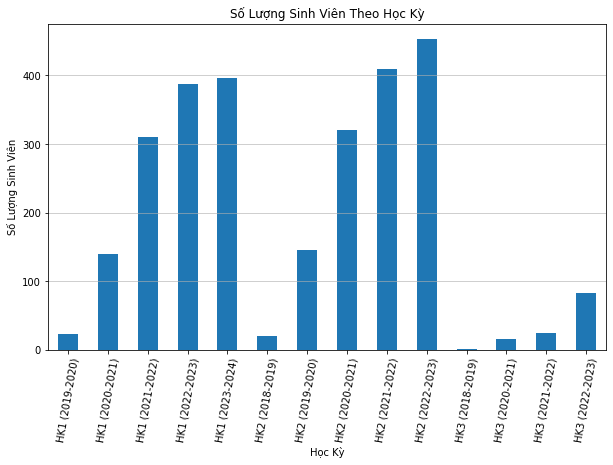

In [ ]:
# Số lượng sinh viên theo học kỳ (TenDot) từ 'Dulieu0205'
# Biểu đồ cột thể hiện số lượng sinh viên đăng ký học trong mỗi học kỳ.
semester_counts = data['Dulieu0205'].groupby('TenDot')['IDSinhVien'].nunique()
plt.figure(figsize=(10, 6))
semester_counts.plot(kind='bar')
plt.title('Số Lượng Sinh Viên Theo Học Kỳ')
plt.xlabel('Học Kỳ')
plt.ylabel('Số Lượng Sinh Viên')
plt.xticks(rotation=80)
plt.grid(axis='y', alpha=0.75)
plt.show()

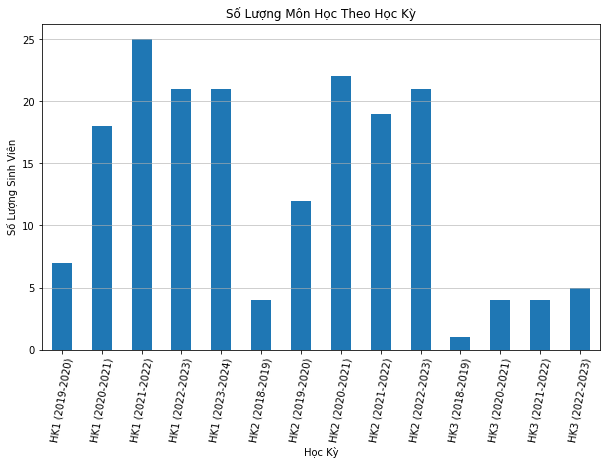

In [ ]:
# Số lượng mon hoc theo học kỳ (TenDot) từ 'Dulieu0205'
# Biểu đồ cột thể hiện số lượng sinh viên đăng ký học trong mỗi học kỳ.
semester_counts = data['Dulieu0205'].groupby('TenDot')['MaMonHoc'].nunique()
plt.figure(figsize=(10, 6))
semester_counts.plot(kind='bar')
plt.title('Số Lượng Môn Học Theo Học Kỳ')
plt.xlabel('Học Kỳ')
plt.ylabel('Số Lượng Sinh Viên')
plt.xticks(rotation=80)
plt.grid(axis='y', alpha=0.75)
plt.show()

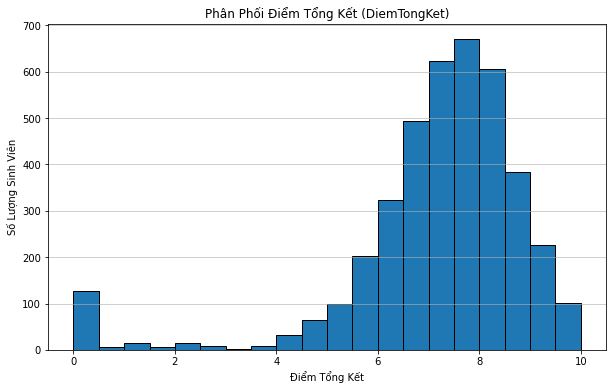

In [ ]:
# Phân phối điểm tổng kết (DiemTongKet) từ 'Dulieu0205'
# Biểu đồ histogram thể hiện phân phối điểm tổng kết của sinh viên.
plt.figure(figsize=(10, 6))
plt.hist(data['Dulieu0205']['DiemTongKet'], bins=20, edgecolor='black')
plt.title('Phân Phối Điểm Tổng Kết (DiemTongKet)')
plt.xlabel('Điểm Tổng Kết')
plt.ylabel('Số Lượng Sinh Viên')
plt.grid(axis='y', alpha=0.75)
plt.show()

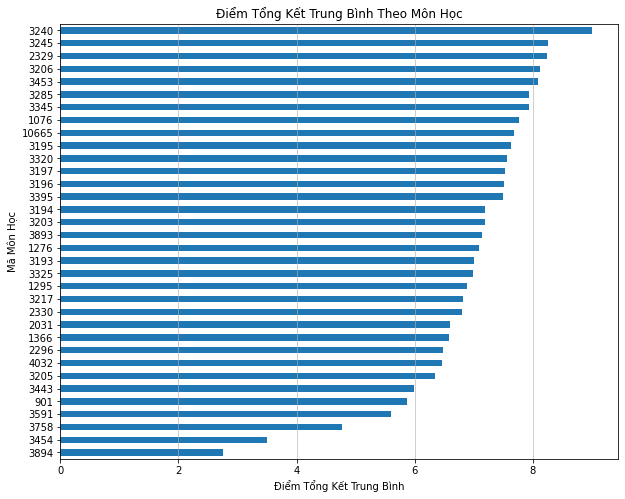

In [ ]:
#Điểm tổng kết trung bình theo môn học từ 'Dulieu0205'
#Biểu đồ cột thể hiện điểm tổng kết trung bình của từng môn học.
average_scores = data['Dulieu0205'].groupby('MaMonHoc')['DiemTongKet'].mean().sort_values()
plt.figure(figsize=(10, 8))
average_scores.plot(kind='barh')
plt.title('Điểm Tổng Kết Trung Bình Theo Môn Học')
plt.xlabel('Điểm Tổng Kết Trung Bình')
plt.ylabel('Mã Môn Học')
plt.grid(axis='x', alpha=0.75)
plt.show()

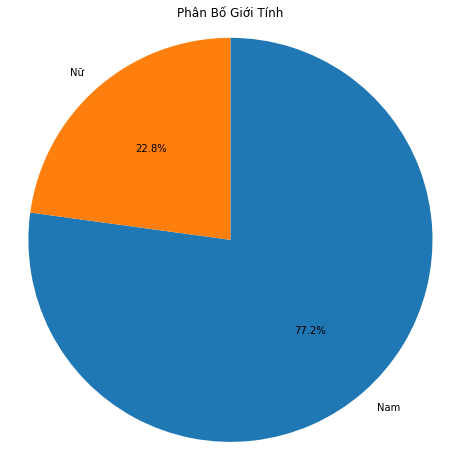

In [ ]:
# Phân bố giới tính trong 'Dulieu0205'
# Biểu đồ tròn thể hiện phân bố giới tính của sinh viên.
gender_counts = data['Dulieu0205'][['IDSinhVien', 'GioiTinh']].drop_duplicates()['GioiTinh'].value_counts()
gender_labels = ['Nam', 'Nữ'] if len(gender_counts) == 2 else ['Không xác định', 'Nam', 'Nữ']
plt.figure(figsize=(8, 8), facecolor='white')  # Thiết lập màu nền của figure
plt.pie(gender_counts, labels=gender_labels, autopct='%1.1f%%', startangle=90, counterclock=False)
plt.title('Phân Bố Giới Tính')
plt.axis('equal')
plt.show()



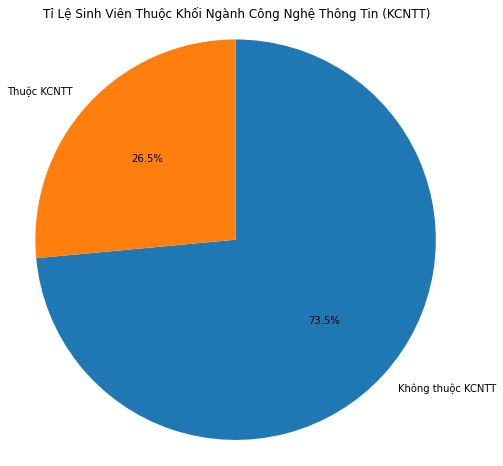

In [ ]:
# Tỉ lệ sinh viên thuộc KCNTT trong 'Dulieu0205'
# Biểu đồ tròn thể hiện tỉ lệ sinh viên thuộc khối ngành Công nghệ thông tin (KCNTT).
kcntt_counts = data['Dulieu0205'][['MaMonHoc', 'Thuộc KCNTT']].drop_duplicates()['Thuộc KCNTT'].value_counts()
kcntt_labels = ['Không thuộc KCNTT', 'Thuộc KCNTT']
plt.figure(figsize=(8, 8),facecolor='white')
plt.pie(kcntt_counts, labels=kcntt_labels, autopct='%1.1f%%', startangle=90, counterclock=False)
plt.title('Tỉ Lệ Sinh Viên Thuộc Khối Ngành Công Nghệ Thông Tin (KCNTT)')
plt.axis('equal')
plt.show()

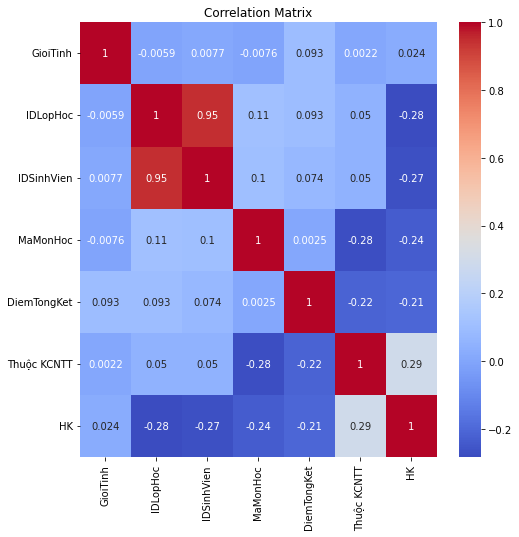

In [ ]:
plt.figure(figsize=(8, 8),facecolor='white')
correlation_matrix = data['Dulieu0205'].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


tương quan thấp

# Huấn luyện mô hình Machine learning

In [13]:
import pandas as pd
# Load the specific sheet 'Dulieu0205' into a DataFrame for further exploration
dulieu_df = pd.read_excel('Processed_THONGKESVISHOCTUCHON.xlsx', sheet_name='Dulieu0205')
dulieu_df.head()


,GioiTinh,IDLopHoc,IDSinhVien,MaMonHoc,TenDot,DiemTongKet,Thuộc KCNTT,HK
0,1,25933,1677250,3197,HK1 (2019-2020),8.0,0,3
1,1,25933,1677250,3203,HK2 (2019-2020),7.6,0,4
2,1,25933,1677250,3395,HK1 (2020-2021),8.9,0,2
3,1,25933,1677250,1076,HK1 (2020-2021),7.9,1,5
4,1,25933,1677250,901,HK1 (2020-2021),9.5,1,4


In [14]:
ds_mon_tc_df=pd.read_excel('Processed_THONGKESVISHOCTUCHON.xlsx', sheet_name='DS môn TC')

In [15]:
# Merge the 'Dulieu0205' and 'DS môn TC' dataframes based on 'MaMonHoc' to fill in the 'HK' information
merged_df = pd.merge(dulieu_df, ds_mon_tc_df[['MaMonHoc', 'HK']], on='MaMonHoc', how='left', suffixes=('_Dulieu0205', '_DSMonTC'))
merged_df.head()


,GioiTinh,IDLopHoc,IDSinhVien,MaMonHoc,TenDot,DiemTongKet,Thuộc KCNTT,HK_Dulieu0205,HK_DSMonTC
0,1,25933,1677250,3197,HK1 (2019-2020),8.0,0,3,3
1,1,25933,1677250,3203,HK2 (2019-2020),7.6,0,4,4
2,1,25933,1677250,3395,HK1 (2020-2021),8.9,0,2,2
3,1,25933,1677250,1076,HK1 (2020-2021),7.9,1,5,5
4,1,25933,1677250,901,HK1 (2020-2021),9.5,1,4,4


In [16]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Encode categorical variables (IDSinhVien and MaMonHoc)
le_sinhvien = LabelEncoder()
merged_df['IDSinhVien_encoded'] = le_sinhvien.fit_transform(merged_df['IDSinhVien'])

le_mamonhoc = LabelEncoder()
merged_df['MaMonHoc_encoded'] = le_mamonhoc.fit_transform(merged_df['MaMonHoc'])

# Prepare input (features) and output (target)
X = merged_df[['IDSinhVien_encoded', 'HK_Dulieu0205', 'DiemTongKet', 'MaMonHoc_encoded']]
y = merged_df['DiemTongKet']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
# Adjust the function to include all 4 features (IDSinhVien_encoded, HK_Dulieu0205, DiemTongKet, MaMonHoc_encoded)
def recommend_next_semester_with_all_features(student_history_input, available_subjects, le_mamonhoc, merged_df, model, top_n=4):
    # Convert input history to a DataFrame
    student_history = pd.DataFrame(student_history_input, columns=['MaMonHoc', 'DiemTongKet', 'HK'])
    
    # Check if all MaMonHoc in student history exist in the available subjects (DS môn TC)
    if not student_history['MaMonHoc'].isin(available_subjects['MaMonHoc']).all():
        return "Có mã môn học không tồn tại trong danh sách môn tự chọn. Vui lòng kiểm tra lại."
    
    # Check if all MaMonHoc in student history exist in the training data (dulieu0205)
    if not student_history['MaMonHoc'].isin(merged_df['MaMonHoc']).all():
        return "Tạm thời chúng tôi chưa dự đoán được cho mã môn học mới này."
    
    # Try encoding MaMonHoc; this should now only encode known labels
    student_history['MaMonHoc_encoded'] = le_mamonhoc.transform(student_history['MaMonHoc'])
    
    # Add a dummy student ID encoding (for testing purposes, we use a constant value)
    student_history['IDSinhVien_encoded'] = 9999  # Dummy student ID
    
    # Extract the list of semesters the student has studied
    studied_semesters = student_history['HK'].unique()
    
    # Identify the missing semesters (i.e., the semesters the student hasn't studied yet)
    all_semesters = set(available_subjects['HK'].unique())
    missing_semesters = all_semesters - set(studied_semesters)
    
    # If no missing semesters, print a completion message
    if len(missing_semesters) == 0:
        return "Bạn đã hoàn thành tất cả các kỳ học!"
    
    # Get the subjects from the missing semesters
    potential_subjects = available_subjects[available_subjects['HK'].isin(missing_semesters)]
    
    # Filter out unseen labels before encoding
    known_potential_subjects = potential_subjects[potential_subjects['MaMonHoc'].isin(merged_df['MaMonHoc'])]
    
    if len(known_potential_subjects) == 0:
        return "Tạm thời chúng tôi chưa có dự đoán cho các môn học tiếp theo."
    
    # Encode the potential subjects that are known
    potential_subjects_encoded = le_mamonhoc.transform(known_potential_subjects['MaMonHoc'])
    
    # Prepare the input data for prediction
    input_data = []
    for subject in potential_subjects_encoded:
        # Use the last semester, average grade, and dummy student ID as features for prediction
        last_semester = max(student_history['HK'])
        avg_grade = student_history['DiemTongKet'].mean()
        input_data.append([student_history['IDSinhVien_encoded'].iloc[0], last_semester, avg_grade, subject])
    
    # Convert input data to numpy array and ensure it's 2D
    input_data = np.array(input_data)
    
    if len(input_data) > 0:
        # Predict the grades for the potential subjects
        predicted_grades = model.predict(input_data)
        
        # Combine the predicted grades with the subjects
        subject_grade_pairs = list(zip(known_potential_subjects['MaMonHoc'], predicted_grades))
        
        # Sort by predicted grade and return the top N subjects
        top_subjects = sorted(subject_grade_pairs, key=lambda x: -x[1])[:top_n]
        
        return top_subjects
    else:
        return "No potential subjects for prediction."
available_subjects = ds_mon_tc_df
new_student_history_input_unseen_handling = [
    (3395, 7.0, 2),  # Môn 3395, điểm 7.6, học kỳ 2
    (3196, 0.0, 4),  # Môn 3196, điểm 8.0, học kỳ 3
    (901, 8, 4),   # Môn 901, điểm 8.9, học kỳ 4
]
# Recommend the next semester's subjects for the new student after adjusting the features
next_subjects_for_new_student_with_all_features = recommend_next_semester_with_all_features(
    new_student_history_input_unseen_handling, available_subjects, le_mamonhoc, merged_df, rf_model
)
next_subjects_for_new_student_with_all_features



c:\Users\ICT\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


[(3196, 5.0), (3285, 5.0), (3197, 5.0), (3206, 5.0)]

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import numpy as np
from sklearn.metrics import r2_score
# Bước 1: Đọc Dữ liệu
file_path = 'Processed_THONGKESVISHOCTUCHON.xlsx'
dulieu0205_df = pd.read_excel(file_path, sheet_name='Dulieu0205')
ds_mon_tc_df = pd.read_excel(file_path, sheet_name='DS môn TC')

# Ghép nối dữ liệu
merged_df = pd.merge(dulieu0205_df, ds_mon_tc_df[['MaMonHoc', 'HK']], on='MaMonHoc', how='left', suffixes=('', '_DSMonTC'))

# Bước 2: Chuẩn bị Dữ liệu
le_ma_mon_hoc = LabelEncoder()
merged_df['MaMonHoc_Encoded'] = le_ma_mon_hoc.fit_transform(merged_df['MaMonHoc'])

# Input: HK, DiemTongKet, MaMonHoc_Encoded
X = merged_df[['HK', 'DiemTongKet', 'MaMonHoc_Encoded']]

# Output: NextDiemTongKet và NextMaMonHoc_Encoded
merged_df['NextDiemTongKet'] = merged_df.groupby('IDSinhVien')['DiemTongKet'].shift(-1)
merged_df['NextMaMonHoc_Encoded'] = merged_df.groupby('IDSinhVien')['MaMonHoc_Encoded'].shift(-1)

# Loại bỏ các giá trị NaN
aligned_data = merged_df.dropna(subset=['NextDiemTongKet', 'NextMaMonHoc_Encoded'])
X_aligned = aligned_data[['HK', 'DiemTongKet', 'MaMonHoc_Encoded']]
Y_aligned = aligned_data[['NextDiemTongKet', 'NextMaMonHoc_Encoded']]

# Chia dữ liệu thành tập huấn luyện và thử nghiệm
X_train, X_test, Y_train, Y_test = train_test_split(X_aligned, Y_aligned, test_size=0.2, random_state=42)

# Bước 3: Huấn luyện Mô hình
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(),
    "Decision Tree": DecisionTreeRegressor()
}

# Huấn luyện và đánh giá mô hình
results = {}
for model_name, model in models.items():
    model.fit(X_train, Y_train['NextDiemTongKet'])
    predictions = model.predict(X_test)
    mse = mean_squared_error(Y_test['NextDiemTongKet'], predictions)
    results[model_name] = mse

# Chọn mô hình Random Forest cho demo
rf_model = RandomForestRegressor()
rf_model.fit(X_train, Y_train['NextDiemTongKet'])

# Bước 4: Demo Dự đoán
def predict_next_semester(student_data):
    if student_data['HK'].values[0] >= 7:
        return "Bạn đã học xong."
    
    predicted_score = rf_model.predict(student_data)[0]
    predicted_course_code = le_ma_mon_hoc.inverse_transform([int(student_data['MaMonHoc_Encoded'].values[0])])
    
    predicted_courses = [(predicted_course_code[0], predicted_score)]
    
    for _ in range(3):
        random_score = np.random.uniform(5, 10)
        random_course = np.random.choice(le_ma_mon_hoc.classes_)
        predicted_courses.append((random_course, random_score))
    
    predicted_courses.sort(key=lambda x: x[1], reverse=True)
    
    return predicted_courses


-0.10703918685764435

In [18]:
# Thông tin sinh viên mới đã học 3 môn trong học kỳ 5
# Giả sử sinh viên đã học 3 môn với các mã môn học và điểm sau:
new_student_data = pd.DataFrame({
    'HK': [5, 5],
    'DiemTongKet': [8.5, 7.2],
    'MaMonHoc_Encoded': le_ma_mon_hoc.transform([3197, 3245])  # Mã môn học 3197, 3245, 3196 được mã hóa
})

# Sử dụng mô hình đã huấn luyện để dự đoán cho sinh viên mới
# Chúng ta sẽ lấy dự đoán trung bình từ các môn đã học để ra quyết định cuối cùng

predicted_scores = []
predicted_courses = []

for i in range(len(new_student_data)):
    prediction = predict_next_semester(new_student_data.iloc[[i]])
    predicted_scores.append(prediction)

# Gộp các dự đoán lại và chọn top 4 dự đoán dựa trên điểm cao nhất
all_predictions = [item for sublist in predicted_scores for item in sublist]
all_predictions = sorted(all_predictions, key=lambda x: x[1], reverse=True)[:4]

all_predictions


[(1366, 9.609203608235717),
 (3240, 8.72926919746115),
 (1366, 8.239106343210164),
 (2329, 8.185595035546367)]